<a href="https://colab.research.google.com/github/JeonSB/JeonSB/blob/main/%EA%B8%B0%EA%B3%84%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%B5%9C%EC%A2%85%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **기계공학에서의 인공지능 최종 프로젝트**

### 자신의 얼굴 인식하는 인공신경망 만들기

60172437 전성배

*********************************train data**************************************
1 번째 사진
true: 0.0


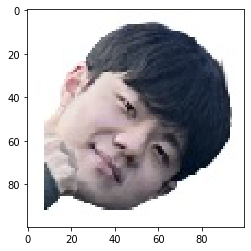

2 번째 사진
true: 0.0


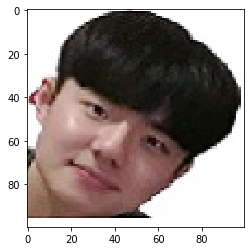

3 번째 사진
true: 0.0


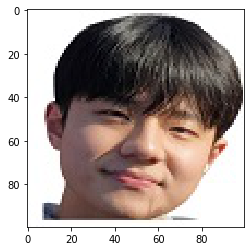

4 번째 사진
true: 0.0


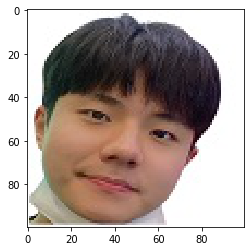

5 번째 사진
true: 0.0


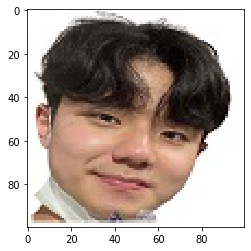

6 번째 사진
true: 0.0


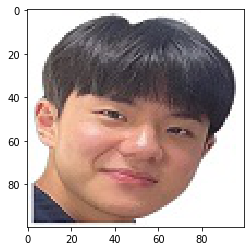

7 번째 사진
true: 0.0


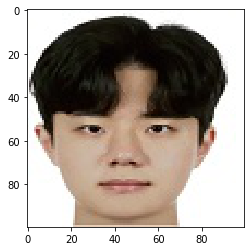

8 번째 사진
true: 0.0


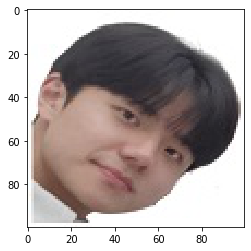

9 번째 사진
true: 0.0


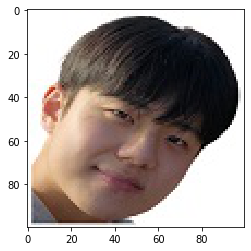

10 번째 사진
true: 0.0


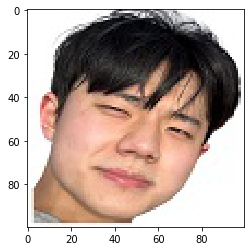

11 번째 사진
true: 1.0


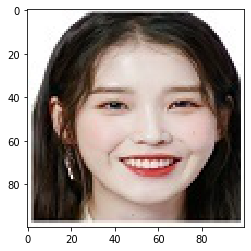

12 번째 사진
true: 1.0


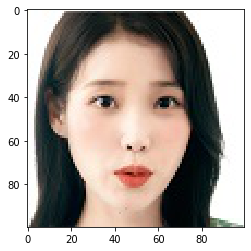

13 번째 사진
true: 1.0


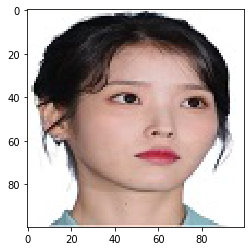

14 번째 사진
true: 1.0


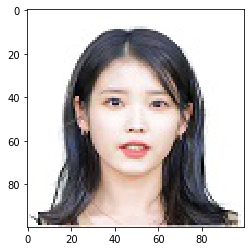

15 번째 사진
true: 1.0


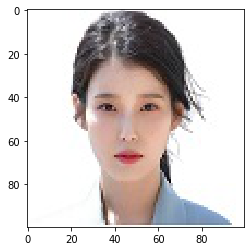

16 번째 사진
true: 1.0


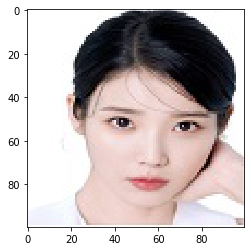

17 번째 사진
true: 1.0


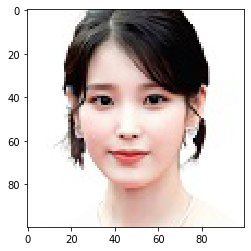

18 번째 사진
true: 1.0


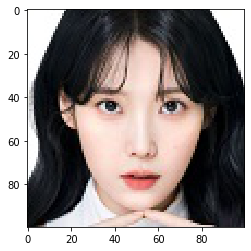

19 번째 사진
true: 1.0


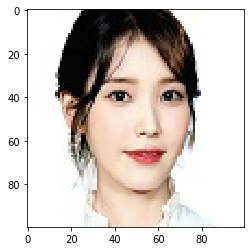

20 번째 사진
true: 1.0


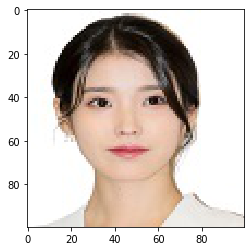

*********************************test data**************************************
1 번째 사진
true: 0


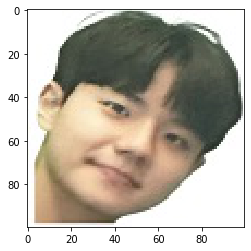

2 번째 사진
true: 1


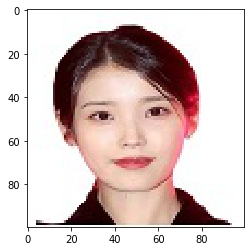

In [90]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

################### 이미지 불러오기 ################### 

myimg1 = image.imread('jeon1.jpg')
myimg2 = image.imread('jeon2.jpg')
myimg3 = image.imread('jeon3.jpg')
myimg4 = image.imread('jeon4.jpg')
myimg5 = image.imread('jeon5.jpg')
myimg6 = image.imread('jeon6.jpg')
myimg7 = image.imread('jeon7.jpg')
myimg8 = image.imread('jeon8.jpg')
myimg9 = image.imread('jeon9.jpg')
myimg10 = image.imread('jeon10.jpg')

iuimg1 = image.imread('iu1.jpg')
iuimg2 = image.imread('iu2.jpg')
iuimg3 = image.imread('iu3.jpg')
iuimg4 = image.imread('iu4.jpg')
iuimg5 = image.imread('iu5.jpg')
iuimg6 = image.imread('iu6.jpg')
iuimg7 = image.imread('iu7.jpg')
iuimg8 = image.imread('iu8.jpg')
iuimg9 = image.imread('iu9.jpg')
iuimg10 = image.imread('iu10.jpg')

#print(myimg1.shape)

################### train data에 이미지 저장 ###################
##### X_train ##### 
X_train = np.array(myimg1)
X_train = np.append(X_train,myimg2,axis=0)
X_train = np.append(X_train,myimg3,axis=0)
X_train = np.append(X_train,myimg4,axis=0)
X_train = np.append(X_train,myimg5,axis=0)
X_train = np.append(X_train,myimg6,axis=0)
X_train = np.append(X_train,myimg7,axis=0)
X_train = np.append(X_train,myimg8,axis=0)
X_train = np.append(X_train,myimg9,axis=0)
X_train = np.append(X_train,myimg10,axis=0)

X_train = np.append(X_train,iuimg1,axis=0)
X_train = np.append(X_train,iuimg2,axis=0)
X_train = np.append(X_train,iuimg3,axis=0)
X_train = np.append(X_train,iuimg4,axis=0)
X_train = np.append(X_train,iuimg5,axis=0)
X_train = np.append(X_train,iuimg6,axis=0)
X_train = np.append(X_train,iuimg7,axis=0)
X_train = np.append(X_train,iuimg8,axis=0)
X_train = np.append(X_train,iuimg9,axis=0)
X_train = np.append(X_train,iuimg10,axis=0)


#print(X_train.shape)
X_train = X_train.reshape(-1,100,100,3)

#print(X_train.shape)
#print(X_train.shape[0])

##### Y_train ##### 
Y_train = np.array([])
for i in range (20):
  if (i<10):
    Y_train = np.append(Y_train,0)
  else:
   Y_train = np.append(Y_train,1)

#print(Y_train)
#print(Y_train.shape)
#print(Y_train.shape[0])

################### test data에 이미지 저장 ###################

myimg_test = image.imread('jeon_test.jpg')
iuimg_test = image.imread('iu_test.jpg')

X_test = np.array(myimg_test)
X_test = np.append(X_test,iuimg_test,axis=0)
X_test = X_test.reshape(-1,100,100,3)
Y_test = np.array([0,1])


################### train data, test data 이미지 출력력 ###################
print('*********************************train data**************************************')

for i in range(20):

  print(i+1,"번째 사진")
  print("true:",Y_train[i])
  plt.imshow(X_train[i].reshape(100,100,3),interpolation='nearest')
  plt.show()


print('*********************************test data**************************************')
for i in range(2):

  print(i+1,"번째 사진")
  print("true:",Y_test[i])
  plt.imshow(X_test[i].reshape(100,100,3),interpolation='nearest')
  plt.show()



In [91]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers


################### 이미지 학습 ###################

##### nomalization #####
X_train = X_train.astype('float32')/255.0

# dropout으로 overfitting 방지
# Conv2D, MaxPooling 방식으로 CNN 학습

model = keras.models.Sequential([
    
    layers.Conv2D(32,kernel_size=3,strides=(1,1),padding='same',activation='relu',input_shape=(100,100,3)),
    layers.Dropout(0.1),
    layers.MaxPool2D(pool_size=(2,2)),
    
    layers.Conv2D(64,kernel_size=5,strides=(2,2),padding='same',activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Conv2D(32,kernel_size=5,strides=(2,2),padding='same',activation='relu'),
    layers.Dropout(0.1),
    layers.MaxPool2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(units = 10, activation = 'relu'),
    layers.Dense(units = 2, activation = 'softmax')
])

model.summary() 

opti = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opti, metrics=['accuracy'])

hist = model.fit(X_train, Y_train, validation_split=0.1 ,batch_size=1000, epochs=100, shuffle=True, verbose = 1)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 dropout_51 (Dropout)        (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 25, 25, 64)        51264     
                                                                 
 dropout_52 (Dropout)        (None, 25, 25, 64)        0         
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                

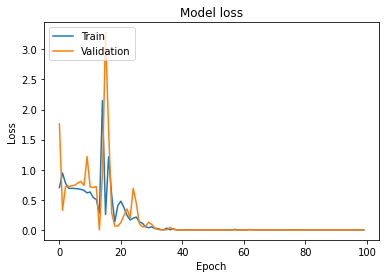

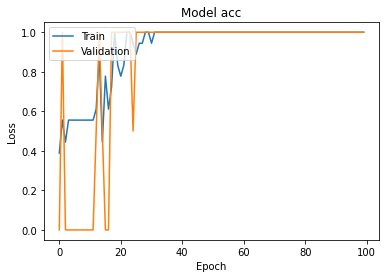

In [77]:
import matplotlib.pyplot as plt

################### loss 와 accuracy 그래프 (validation 포함함) ###################

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()



test loss: 0.0
test accuracy: 1.0
i: 0
1/1 [==============================] - 0s 20ms/step
prediction: [0]
true: 0


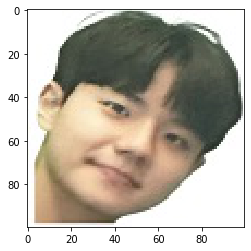

i: 1
1/1 [==============================] - 0s 23ms/step
prediction: [1]
true: 1


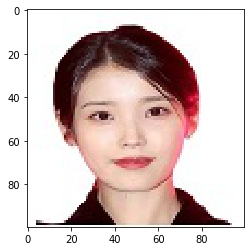

In [94]:
################### 학습한 모델로 평가 (test data 사용) ###################

##### 평가 #####
score = model.evaluate(X_test,Y_test, verbose=0)
print("test loss:", score[0])
print("test accuracy:", score[1])

##### test data 로 predict #####
for i in range(2):

  print("i:",i)
  print("prediction:", np.argmax(model.predict(X_test[i].reshape(1,100,100,3)),axis=1))
  print("true:",Y_test[i])
  plt.imshow(X_test[i].reshape(100,100,3),interpolation='nearest')
  plt.show()

##### 모델 저장 #####
model.save("FinalProject_60172437전성배.h5")